<a href="https://colab.research.google.com/github/HAR5HA-7663/MCS-5993-Evolutionary-Computation-and-Deep-Learning/blob/main/Assignments/ES1115_XOR_optimW_Harsha_Yellela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a neural network for XOR using ES(1+1) with 1/5 rule
- 9 weight values to optimize
- Use sigmod activation function for all neurons
- Not generalized for N hidden layers with M neurons for each hidden Layer
- CJ Chung 2022-

### HW3 Assignment Disclaimer
*	Author Name: V Harsha Yellela
*	LTU ID: 000798754
*	Work Ownership: This work is my own. It is not copied from classmates (Yes/No): Yes
*	AI Assistance: Percentage of code generated with AI tools
(If greater than 0%, briefly describe how AI was used): 10%
*	Understanding: I understand every part of this code (Yes/No):  Yes
*	Confidence: I am confident that I can modify, adapt, and extend this code on my own (Yes/No): Yes

<image src=https://www.robofest.net/DL/XOR_sigmoid.png width=300>

In [34]:
import numpy as np
from math import exp, tanh
from random import random, gauss
import matplotlib.pyplot as plt

In [35]:
def sigmoid(ws):
  return 1.0 / (1.0 + exp(-1.0*ws))

def stairStep(ws):
  if ws > 0:
    return 1.0
  else:
    return 0

def relu(ws):
  return max(0.0, ws)

def tanh(ws):
  return (exp(ws) - exp(-ws)) / (exp(ws) + exp(-ws))

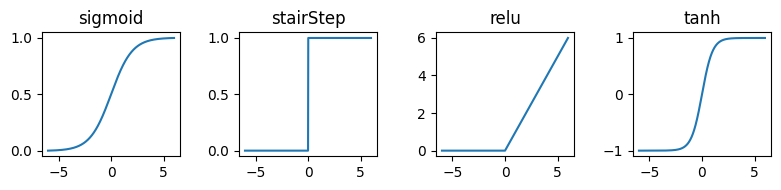

In [36]:
x = np.arange(-6, 6, 0.01) # Grid of 0.01 spacing from -pi to pi
act_fucs = (sigmoid, stairStep, relu, tanh)

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, len(act_fucs), figsize=(8, 2)) # 1 row, 4 columns, smaller figure size

# Plot each activation function in a subplot
for i, act_fuc in enumerate(act_fucs):
  y = [act_fuc(val) for val in x] # List comprehension
  axes[i].plot(x, y)
  axes[i].set_title(act_fuc.__name__) # Set title to function name

plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show()

In [37]:
# inputs are       a, b, 1 (bias)
input = np.array([[0, 0, 1],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]], dtype=float)
desired_out = np.array([0, 1, 1, 0], float)
hidden = np.array([0, 0], float) # to store output of each hidden neuron
test_input = np.array([[0.01, 0, 1],
                      [0, 0.95, 1],
                      [1, 0.05, 1],
                      [0.9, 1, 1]], dtype=float)

In [38]:
# feed forward propagation
def ffp(w, input_arr, i, activation_f): #One hidden layer Feed Forward, i = sample pattern index
  #w = np.array([-0.22086193, -0.02440471,  0.87562968,  1.00092766,  0.17625851,  0.03070678, 1.61655582, -0.7638391,   1.09391015])
  m = 0 #index for 9 weights
  for j in range(len(hidden)):
    hidden[j] = 0.0
    for k in range(3):
    # ---------- complete the missing lines below ------------------------------
        hidden[j] += w[m] * input_arr[i][k]
        m += 1
    hidden[j] = activation_f(hidden[j])

  NN_output = 0.0
  # Add the bias weight for the output neuron
  NN_output += w[m] * 1.0
  m += 1
  for j in range(len(hidden)):
      NN_output += w[m] * hidden[j]
      m += 1
  NN_output = activation_f(NN_output)
  return NN_output

def objFunc(x, input_arr, act_fn):
  errSum = 0.0
  for i in range(4):
  # ---------- complete the missing lines below --------------------------------
    y = ffp(x, input_arr, i, act_fn)
    err = (desired_out[i] - y) ** 2
    errSum += err

  return errSum

In [39]:
def verify(w, act_fn):
  print('\t***** To verify if the w vector above is correct *****')
  for i in range(4):
    y = ffp(w, test_input, i, act_fn)
    # Iterate through input elements for printing
    input_str = ' '.join([f'{x:.2f}' for x in test_input[i]])
    print(f'\t   Test Input: [{input_str}] \tOutput: {y:.1f}')

w1 = np.array([1.7299660387120122, 3.04021437773799, -1.20526745645984, -1.6385111908431627, -2.578129126967211, 3.0036521877830995, 2.505440178023749, 2.5067862885975645, -0.40169355047449445]) # from tanh
w2 = np.array([1.0, 1.0, -0.5, -1.0, -1.0, 1.5, 1.0, 1.0, -1.5]) # works with stairStep
w3 = np.array([15.777498706166504, -13.170463800361835, 6.928145681894125, -9.78751875599886, 15.038835851148951, 8.05298888101147, -11.903670377654652, -14.490754747951865, 19.817246873788978])
verify(w1, tanh)
verify(w2, stairStep)
verify(w3, sigmoid)

	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 1.0
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 0.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


In [40]:
def es_1115 (numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out):
  p = np.zeros(numVar)
  o = np.zeros(numVar)
  #mut_list = np.array([])
  sucessCnt = 0

  # Initialize parent solution
  for j in range(numVar):
    p[j] = low + random() * (high-low)
  parentVal = objFunc(p, input, act_fn)

  for gen in range(1, maxGen+1):
    if gen % windowSize == 0: #update step size
      if sucessCnt > windowSize * 0.2:
        stepSize /= 0.82 #increase
      elif sucessCnt < windowSize * 0.2:
        stepSize *= 0.82 #decrease
      sucessCnt = 0

    # Reproduce (create child)
    for j in range(numVar):
      o[j] = p[j] + gauss(0.0, stepSize)
      o[j] = np.clip(o[j], low, high)

    # Evaluate child
    childVal = objFunc(o, input, act_fn)

    # Selection
    if childVal < parentVal:
      #Child becomes a parent for next generation
      for j in range(numVar):
        p[j] = o[j]
      parentVal = childVal
      sucessCnt+=1

    if gen > 1000 and parentVal > 1.0:
      return p, parentVal, gen, False # No hope

    if parentVal < 0.00005:
      return p, parentVal, gen, True # Acceptable solution found

  return p, parentVal, maxGen, False # Reached max generations

In [41]:
def plot_decision_boundary(best_solution, act_fn, title="Decision Boundary (XOR)", success=True):
    x_min, x_max = 0.0, 1.0
    y_min, y_max = 0.0, 1.0
    step = 0.01  # finer resolution
    xx, yy = np.meshgrid(np.arange(x_min, x_max+step, step),
                         np.arange(y_min, y_max+step, step))

    Z = np.zeros_like(xx, dtype=float)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            inp = np.array([xx[i, j], yy[i, j], 1.0])
            Z[i, j] = ffp(best_solution, [inp], 0, act_fn)

    Z_class = (Z > 0.5).astype(int)

    plt.figure(figsize=(6,6))

    # Create custom colormap with yellow (for 0) and blue (for 1)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'blue'])

    plt.imshow(Z_class, cmap=custom_cmap, origin='lower',
               extent=(x_min, x_max, y_min, y_max), interpolation='nearest')

    # XOR training points
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0,1,1,0])
    for (x1, x2), y in zip(X, Y):
        c = "red" if y == 0 else "white"
        plt.scatter(x1, x2, c=c, edgecolors="k", s=120, marker="s")

    # Title color based on success
    tcolor = "green" if success else "red"
    plt.title(f"{title}", color=tcolor)
    plt.xlabel("x1")
    plt.ylabel("x2")

    # Save automatically
    fname = f"Trial{trial}_DB.png"
    plt.savefig(fname)
    plt.show()


Trial = 1,	0.5000261334314605
Trial = 2,	0.5000153758627129
Trial = 3,	0.6667136989870845
Trial = 4,	0.6667017175338408
Trial = 5,	0.5000828266774948
Trial = 6,	0.6666733725706733
Trial = 7,	1.0000080361236958	 Terminated, since no hope
Trial = 8,	1.0000605773128466	 Terminated, since no hope
Trial = 9,	0.6667197605923966
Trial = 10,	0.5000302148776956
Trial = 11, Acceptable solution found at generation 127
	 w[0]: -10.543047584894218
	 w[1]: 9.360921818470507
	 w[2]: -1.9261698927253865
	 w[3]: 9.201755080320618
	 w[4]: -7.999345684348606
	 w[5]: -6.9225495702249615
	 w[6]: -6.982369649726598
	 w[7]: 13.173766111036908
	 w[8]: 13.964722691035158
	SSE = 4.35869231740307e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


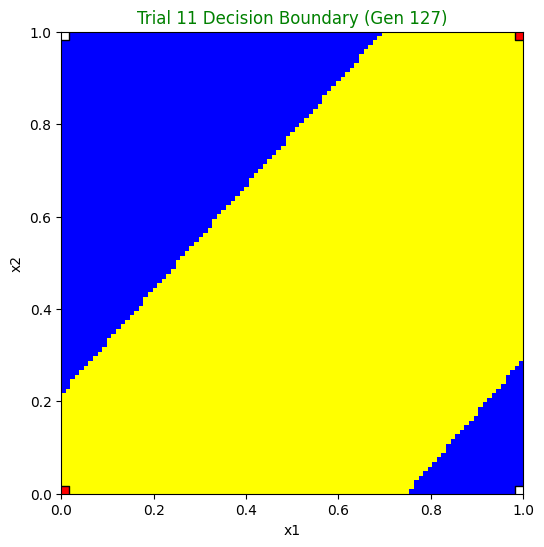

Trial = 12, Acceptable solution found at generation 241
	 w[0]: 9.69017617341467
	 w[1]: 9.172088993315292
	 w[2]: -12.282355852858936
	 w[3]: -7.430871109942208
	 w[4]: -12.227103883691681
	 w[5]: 3.5121047524736873
	 w[6]: 7.063363473096085
	 w[7]: -13.280275778950896
	 w[8]: -13.234192299124476
	SSE = 2.3490823089960874e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


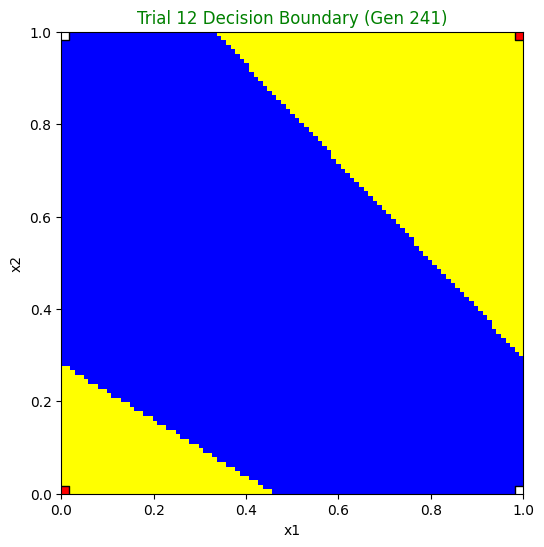

Trial = 13, Acceptable solution found at generation 273
	 w[0]: 8.781055886109229
	 w[1]: -6.580930025123907
	 w[2]: 4.632838226296352
	 w[3]: 20.0
	 w[4]: -17.120213164916137
	 w[5]: -14.74251069591006
	 w[6]: 7.3272728778508025
	 w[7]: -13.13043950865747
	 w[8]: 12.305406716751177
	SSE = 3.487743462480058e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


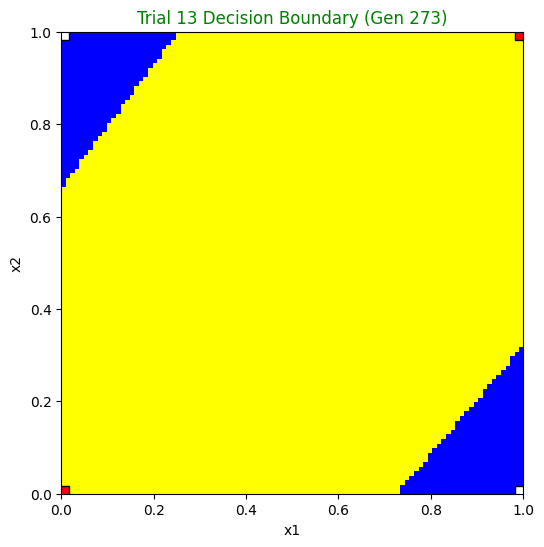

Trial = 14,	0.5000870532673446
Trial = 15, Acceptable solution found at generation 217
	 w[0]: 13.152447261399272
	 w[1]: -19.670178116879438
	 w[2]: 11.540017815745882
	 w[3]: -19.04955941574524
	 w[4]: 13.804806111537541
	 w[5]: 15.068854566268682
	 w[6]: 17.376965875275552
	 w[7]: -11.830437197143448
	 w[8]: -11.325704276806512
	SSE = 4.898360217696991e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


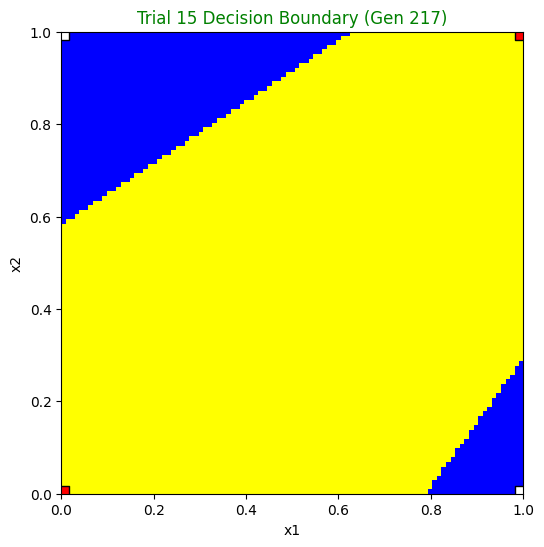

Trial = 16, Acceptable solution found at generation 873
	 w[0]: 11.19781008437892
	 w[1]: -18.660251835350106
	 w[2]: -7.236968276277314
	 w[3]: -8.135415722995337
	 w[4]: 13.48770059401031
	 w[5]: -9.16967687976894
	 w[6]: -5.68264603144231
	 w[7]: 11.748311393175792
	 w[8]: 11.93897302432718
	SSE = 4.4266496643837234e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


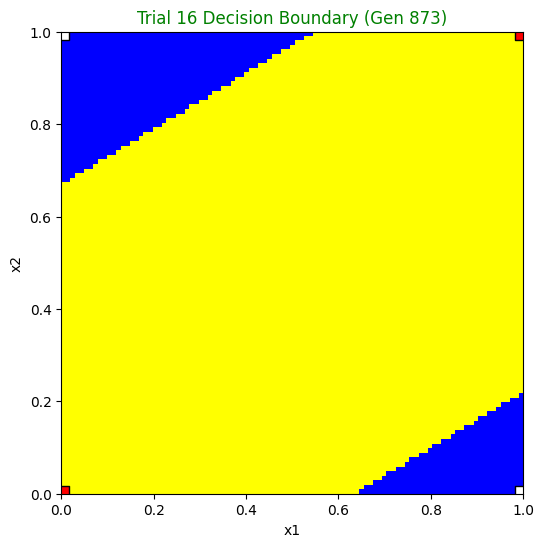

Trial = 17,	1.0000178437726914	 Terminated, since no hope
Trial = 18, Acceptable solution found at generation 9146
	 w[0]: -10.218649627757406
	 w[1]: 11.685525347050529
	 w[2]: -8.857793673314257
	 w[3]: -14.355765132727083
	 w[4]: 8.488191879112717
	 w[5]: 10.105745808504198
	 w[6]: 5.900350701395315
	 w[7]: 12.317514566350301
	 w[8]: -11.884430332105937
	SSE = 3.8120548575915685e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


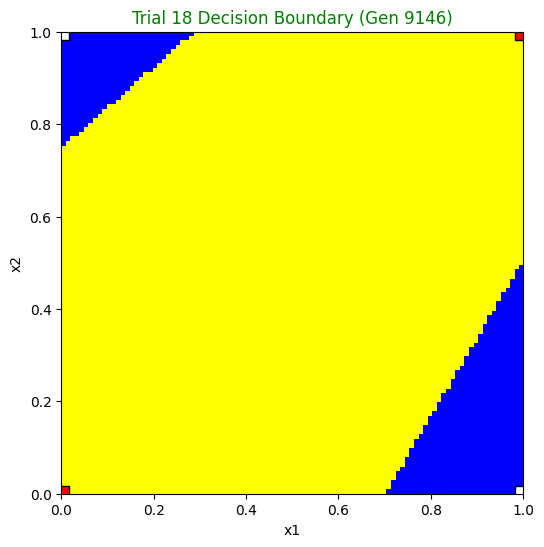

Trial = 19, Acceptable solution found at generation 179
	 w[0]: -6.169132055942296
	 w[1]: -6.750901353707677
	 w[2]: 9.61847008474952
	 w[3]: -5.075445801299375
	 w[4]: -20.0
	 w[5]: 1.0470435219489391
	 w[6]: -5.876966195513877
	 w[7]: 12.731253136956775
	 w[8]: -18.021152583051336
	SSE = 3.0478100533066164e-05
	***** To verify if the w vector above is correct *****
	   Test Input: [0.01 0.00 1.00] 	Output: 0.0
	   Test Input: [0.00 0.95 1.00] 	Output: 1.0
	   Test Input: [1.00 0.05 1.00] 	Output: 1.0
	   Test Input: [0.90 1.00 1.00] 	Output: 0.0


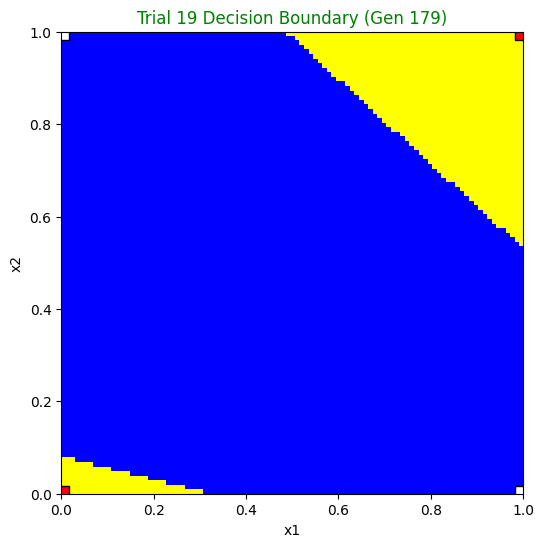

Trial = 20,	0.6667531760226395
Trial = 21,	0.500025674941547
Trial = 22,	0.6667903743176669
Trial = 23,	0.666704104252134
Trial = 24,	0.6667310208278191
Trial = 25,	0.6667000998023616
System Success: 28.0%


In [42]:
totGen = 0
foundCnt = 0
maxGen = 20000
maxTrial = 25

numVar = 9
act_fn = sigmoid # Keras could not find the optimized NN with sigmoid
low = -20.0 # -5 and 5 did not work
high = 20.0

#for 1/5 rule
windowSize = 50 # When 30, 14%; 40-16%, 50-22%
stepSize = 0.82

for trial in range(1, maxTrial+1):
  # Seed the random number generator with the current system time for each trial
  # np.random.seed(int(time.time())) No need. If the seed() function is not explicitly
  # called, the default seed value is derived from the current system time.

  best_solution, best_error, generations, success = es_1115 (
      numVar, low, high, maxGen, windowSize, stepSize, act_fn, input, desired_out
  )

  if success:
    print(f'Trial = {trial}, Acceptable solution found at generation {generations}')
    for j in range(numVar):
      print(f"\t w[{j}]: {best_solution[j]}")
    print(f"\tSSE = {best_error}")

    verify(best_solution, act_fn)
    totGen += generations
    foundCnt += 1

    # Plot the decision boundary for the successful trial
    plot_decision_boundary(best_solution, act_fn, f'Trial {trial} Decision Boundary (Gen {generations})')

  elif generations == 1001:
    print(f'Trial = {trial},\t{best_error}\t Terminated, since no hope')
  elif generations == maxGen:
    print(f'Trial = {trial},\t{best_error}')
print(f'System Success: {foundCnt*100/maxTrial:.1f}%')